In [1]:
import os, sys
import numpy as np
import torch
import torchvision.transforms as transforms
import pandas as pd
BASE_PATH = os.path.dirname(os.path.abspath(""))
sys.path.append(BASE_PATH)

In [2]:
import utils
from modules.pretrained_models import get_pretrained_models

Using cache found in /home/esbaek/.cache/torch/hub/facebookresearch_dinov2_main
/home/esbaek/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/esbaek/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/esbaek/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")
Using cache found in /home/esbaek/.cache/torch/hub/facebookresearch_dinov2_main
/home/esbaek/anaconda3/envs/dinov2/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/esbaek/anaconda3/envs/dinov2/lib/pytho

In [3]:
pd.options.display.float_format = '{:,.1f}'.format
DATA_PATH='/home/datasets'

# Domain Generalization
The impact of domain generalization techniques on enhancing the robustness in theenvironment and sensor domains is displayed below. This visualization corresponds to **Table 2.** in the paper.

Before running the below lines of code, the results should be preapred in `results/aug_experiments.txt` file. This result file can be made by running `augment_analysis.py` or `aug_analysis.sh`.

In [4]:
result_path = os.path.join(BASE_PATH, 'results', 'aug_experiments.txt')

In [5]:
df = pd.read_csv(result_path, index_col=0)

In [6]:
df

,Augmentations,Use-ES-data,ImageNet val.,ImageNet-C val.,ImageNet-ES val.
Id,,,,,
1,Comp Aug.,False,85.8,51.0,49.6
2,Basic Digital Aug.,False,85.8,51.7,50.4
3,Advanced Digital Aug.,False,85.5,57.4,49.1
4,Comp Aug.,True,86.0,51.8,55.8
5,Basic Digital Aug.,True,85.8,51.4,54.5
6,Advanced Digital Aug.,True,84.0,57.9,53.7


# Parameter Control
the impact of sensor parameter control on model performance is displayed below. This visualization corresponds to Table 3. in the paper.

Before running the below lines of code, the results should be preapred in `results` directory. The result files can be made by running `imagenet_es_eval.py` or `eval_scripts.sh`.

In [7]:
result_dir = os.path.join(BASE_PATH, 'results')
available_models = ['eff_b0', 'eff_b3', 'res50', 'res50_aug', 'res152',  'swin_t', 'swin_b', 'clip_b', 'clip_h', 'dinov2_b', 'dinov2']
summary = []

In [8]:
for m in available_models:
    df_IN = pd.read_csv(os.path.join(result_dir, f'{m}_imagenet-tin.csv'))
    df_IN_ES = pd.read_csv(os.path.join(result_dir, f'{m}_imagenet-es.csv'))
    df_IN_ES_AUTO = pd.read_csv(os.path.join(result_dir, f'{m}_imagenet-es-auto.csv'))
    is_timm = True if 'clip' in m else False
    model = get_pretrained_models(is_timm, m)
    cnt = utils.count_parameters(model)/1E+6
    summary.append([m, cnt, df_IN['Acc.'].mean(), df_IN_ES_AUTO['Acc.'].mean(), df_IN_ES['Acc.'].mean(), df_IN_ES['Acc.'].max()])

Model loaded from PyTorch: eff_b0
Model loaded from PyTorch: eff_b3
Model loaded from PyTorch: res50
Model loaded from PyTorch: res50_aug
Model loaded from PyTorch: res152
Model loaded from PyTorch: swin_t
Model loaded from PyTorch: swin_b
Model loaded from timm: clip_b
Model loaded from timm: clip_h
Model loaded from PyTorch: dinov2_b
Model loaded from PyTorch: dinov2


In [25]:
pd.DataFrame(summary, columns=['Model', 'Num. Params', 'IN', 'IN-ES_Auto', 'IN-ES-All_params','IN-ES_Best'])

,Model,Num. Params,IN,IN-ES_Auto,IN-ES-All_params,IN-ES_Best
0,eff_b0,5.3,88.1,51.4,58.1,83.8
1,eff_b3,12.2,88.3,62.0,66.2,86.8
2,res50,25.6,86.3,32.2,50.2,80.1
3,res50_aug,25.6,87.0,53.3,61.4,84.0
4,res152,60.2,87.6,41.1,54.3,83.3
5,swin_t,28.4,90.7,54.2,63.1,86.8
6,swin_b,87.9,92.0,60.1,65.6,89.0
7,clip_b,86.6,94.3,66.3,71.0,92.7
8,clip_h,632.0,94.7,79.1,77.6,94.7
9,dinov2_b,90.4,93.6,74.5,73.9,92.2


## Detailed evaluation results by model
Evalautaion results per camera parameter setting is illustrated below. This corresponds to Table. 7~13 in Appendix

In [69]:
# Set model name here
# Available option: 'eff_b0', 'eff_b3', 'res50', 'res50_aug', 'res152',  'swin_t', 'swin_b', 'clip_b', 'clip_h', 'dinov2_b', 'dinov2'
model_name = 'res50'

In [64]:
df_IN_ES = pd.read_csv(os.path.join(result_dir, f'{model_name}_imagenet-es.csv'))
df_IN_ES_AUTO = pd.read_csv(os.path.join(result_dir, f'{model_name}_imagenet-es-auto.csv'))

### Manual parameter settings

In [66]:
pd.pivot_table(df_IN_ES, values='Acc.', index=['Camera Parameter'], columns=['Light'], aggfunc='sum')

Light,l1,l5
Camera Parameter,,
param_1,49.1,49.3
param_10,71.8,75.3
param_11,26.4,31.0
param_12,2.6,4.3
param_13,78.1,76.7
param_14,78.2,78.1
param_15,40.8,46.4
param_16,18.9,12.9
param_17,69.3,63.8


In [74]:
pd.pivot_table(df_IN_ES, values='Acc.', index=[], columns=['Light'], aggfunc=['max','min','mean'])

max      min     mean     
Light   l1   l5  l1  l5   l1   l5
Acc.  79.3 80.1 0.6 0.7 50.2 50.2

### Auto exposure setting

In [68]:
pd.pivot_table(df_IN_ES_AUTO, values='Acc.', index=[], columns=['Light'], aggfunc='mean')

Light,l1,l5
Acc.,34.4,30.0


In [7]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
import torchvision.models as models
from metadata.indices_in_1k import indices_dict, imagenet_tiny_wnids
import matplotlib.pyplot as plt

In [8]:
sum(indices_dict['imagenet-tin'])

200

In [17]:
def prepare_figs(c, f, _model, params):
    sz = 224
    # concat_img = np.zeros((sz*3,sz*9,3),dtype=np.uint8)
    concat_img = np.zeros((sz*len(params),sz,3),dtype=np.uint8)
    light = 'l1'
    valdir_im_es = os.path.join(DATA_PATH, 'ImageNet-ES', 'es-test', 'param_control')
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    for i, param in enumerate(params):
        curr_dir = os.path.join(valdir_im_es, light, 'param_' + str(param))
        im = Image.open(os.path.join(curr_dir, c, f))        
        im = transforms.Resize(256)(im)
        im = transforms.CenterCrop(224)(im)
    
        im_sm = im.resize((sz,sz))    
    
        im_tensor = transforms.ToTensor()(im)
        # im_tensor = normalize(im_tensor)
        im_tensor = im_tensor.unsqueeze(0).cuda()
    
        target = imagenet_tiny_wnids.index(c)
        index_filter = indices_dict['imagenet-es']
        pred = _model(im_tensor)[:, index_filter]
        # pred = _model(im_tensor)
        print(target, pred.max(1)[1][0])
    
        correct = True if pred.max(1)[1].cpu().numpy()[0] == target else False 
    
        draw = ImageDraw.Draw(im_sm)
        color = 'green' if correct else 'red'
        draw.rectangle((0,0,sz,sz), outline=color, width = 5)
        
        h_start, h_end = sz * (i), sz * (i) + sz
        w_start, w_end = 0, sz
        concat_img[h_start:h_end, w_start:w_end] = np.array(im_sm)

    return concat_img

In [14]:
def load_model_from_ckpt(ckpt_file):
    model = models.resnet50(pretrained=False)
    state_dict = torch.load(ckpt_file)['state_dict']
    new_state_dict = {}
    
    for k, v in state_dict.items():
        new_state_dict[k[7:]] = v
    model.load_state_dict(new_state_dict)
    model = model.cuda()
    return model    

In [15]:
ckpt_0_0 = os.path.join(BASE_PATH, 'ckpt', 'aug_exp_0_0.pt')
model_0_0 = load_model_from_ckpt(ckpt_0_0)
ckpt_1_0 = os.path.join(BASE_PATH, 'ckpt','aug_exp_1_0.pt')
model_1_0 = load_model_from_ckpt(ckpt_1_0)
ckpt_2_0 = os.path.join(BASE_PATH, 'ckpt','aug_exp_2_0.pt')
model_2_0 = load_model_from_ckpt(ckpt_2_0)
ckpt_0_1 = os.path.join(BASE_PATH, 'ckpt','aug_exp_0_1.pt')
model_0_1 = load_model_from_ckpt(ckpt_0_1)
ckpt_1_1 = os.path.join(BASE_PATH, 'ckpt','aug_exp_1_1.pt')
model_1_1 = load_model_from_ckpt(ckpt_1_1)
ckpt_2_1 = os.path.join(BASE_PATH, 'ckpt','aug_exp_2_1.pt')
model_2_1 = load_model_from_ckpt(ckpt_2_1)

34 tensor(80, device='cuda:0')
34 tensor(80, device='cuda:0')
34 tensor(131, device='cuda:0')
34 tensor(80, device='cuda:0')
34 tensor(80, device='cuda:0')
34 tensor(80, device='cuda:0')
34 tensor(80, device='cuda:0')
34 tensor(80, device='cuda:0')
34 tensor(131, device='cuda:0')
34 tensor(80, device='cuda:0')
34 tensor(80, device='cuda:0')
34 tensor(131, device='cuda:0')
34 tensor(156, device='cuda:0')
34 tensor(156, device='cuda:0')
34 tensor(131, device='cuda:0')
34 tensor(131, device='cuda:0')
34 tensor(131, device='cuda:0')
34 tensor(131, device='cuda:0')


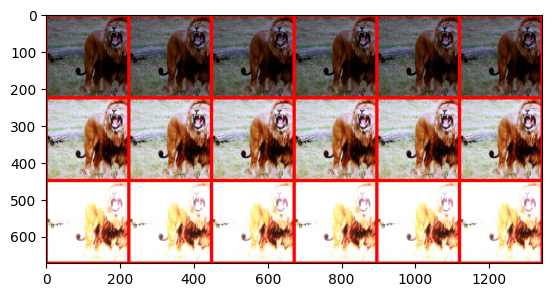

In [18]:
c, f = 'n02129165', 'ILSVRC2012_val_00027413.JPEG' # LION
concat_img_0_0 = prepare_figs(c,f,model_0_0, [8,14,15])
concat_img_0_1 = prepare_figs(c,f,model_0_1, [8,14,15])
concat_img_1_0 = prepare_figs(c,f,model_1_0, [8,14,15])
concat_img_1_1 = prepare_figs(c,f,model_1_1, [8,14,15])
concat_img_2_0 = prepare_figs(c,f,model_2_0, [8,14,15])
concat_img_2_1 = prepare_figs(c,f,model_2_1, [8,14,15])

sz = 224
agg_img = np.zeros((sz * 3, sz * 6, 3), dtype=np.uint8)
i = 0
agg_img[:,sz*i:sz*(i+1)] = concat_img_0_0; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_1_0; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_2_0; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_0_1; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_1_1; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_2_1; i += 1
plt.imshow(agg_img)

99 tensor(80, device='cuda:0')
99 tensor(80, device='cuda:0')
99 tensor(131, device='cuda:0')
99 tensor(80, device='cuda:0')
99 tensor(131, device='cuda:0')
99 tensor(131, device='cuda:0')
99 tensor(80, device='cuda:0')
99 tensor(80, device='cuda:0')
99 tensor(131, device='cuda:0')
99 tensor(131, device='cuda:0')
99 tensor(80, device='cuda:0')
99 tensor(131, device='cuda:0')
99 tensor(131, device='cuda:0')
99 tensor(131, device='cuda:0')
99 tensor(131, device='cuda:0')
99 tensor(131, device='cuda:0')
99 tensor(131, device='cuda:0')
99 tensor(131, device='cuda:0')


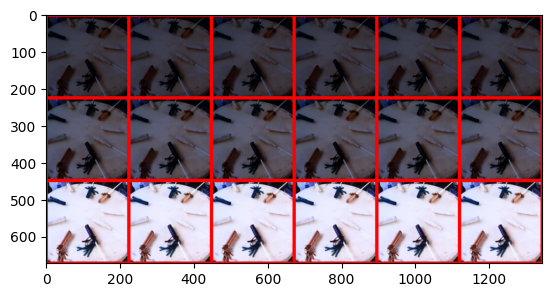

In [16]:
c, f = 'n03250847', 'ILSVRC2012_val_00040670.JPEG' # Table
concat_img_0_0 = prepare_figs(c,f,model_0_0, [13,23,24])
concat_img_0_1 = prepare_figs(c,f,model_0_1, [13,23,24])
concat_img_1_0 = prepare_figs(c,f,model_1_0, [13,23,24])
concat_img_1_1 = prepare_figs(c,f,model_1_1, [13,23,24])
concat_img_2_0 = prepare_figs(c,f,model_2_0, [13,23,24])
concat_img_2_1 = prepare_figs(c,f,model_2_1, [13,23,24])

sz = 224
agg_img = np.zeros((sz * 3, sz * 6, 3), dtype=np.uint8)
i = 0
agg_img[:,sz*i:sz*(i+1)] = concat_img_0_0; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_1_0; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_2_0; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_0_1; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_1_1; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_2_1; i += 1
plt.imshow(agg_img)

68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')
68 tensor(131, device='cuda:0')


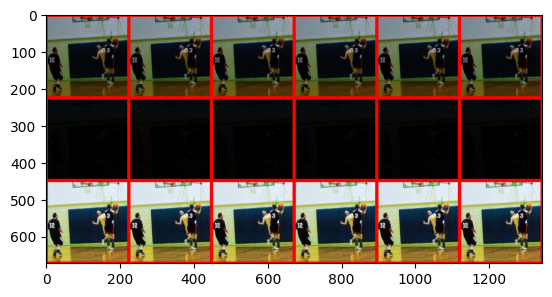

In [17]:
c, f = 'n02802426', 'ILSVRC2012_val_00025839.JPEG' # Basketball
concat_img_0_0 = prepare_figs(c,f,model_0_0, [8,16,19])
concat_img_0_1 = prepare_figs(c,f,model_0_1, [8,16,19])
concat_img_1_0 = prepare_figs(c,f,model_1_0, [8,16,19])
concat_img_1_1 = prepare_figs(c,f,model_1_1, [8,16,19])
concat_img_2_0 = prepare_figs(c,f,model_2_0, [8,16,19])
concat_img_2_1 = prepare_figs(c,f,model_2_1, [8,16,19])

sz = 224
agg_img = np.zeros((sz * 3, sz * 6, 3), dtype=np.uint8)
i = 0
agg_img[:,sz*i:sz*(i+1)] = concat_img_0_0; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_1_0; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_2_0; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_0_1; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_1_1; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_2_1; i += 1
plt.imshow(agg_img)

35 tensor(80, device='cuda:0')
35 tensor(80, device='cuda:0')
35 tensor(80, device='cuda:0')
35 tensor(80, device='cuda:0')
35 tensor(80, device='cuda:0')
35 tensor(80, device='cuda:0')
35 tensor(80, device='cuda:0')
35 tensor(80, device='cuda:0')
35 tensor(80, device='cuda:0')
35 tensor(80, device='cuda:0')
35 tensor(80, device='cuda:0')
35 tensor(80, device='cuda:0')
35 tensor(131, device='cuda:0')
35 tensor(156, device='cuda:0')
35 tensor(131, device='cuda:0')
35 tensor(131, device='cuda:0')
35 tensor(131, device='cuda:0')
35 tensor(131, device='cuda:0')


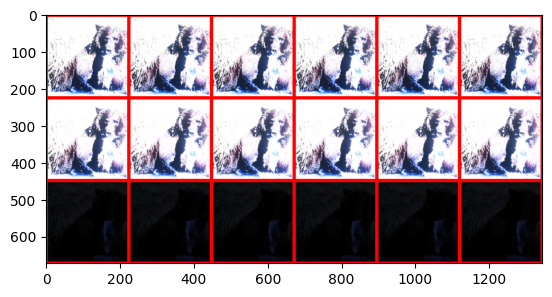

In [18]:
c, f = 'n02132136', 'ILSVRC2012_val_00048979.JPEG' # Bear
concat_img_0_0 = prepare_figs(c,f,model_0_0, [1,15,26])
concat_img_0_1 = prepare_figs(c,f,model_0_1, [1,15,26])
concat_img_1_0 = prepare_figs(c,f,model_1_0, [1,15,26])
concat_img_1_1 = prepare_figs(c,f,model_1_1, [1,15,26])
concat_img_2_0 = prepare_figs(c,f,model_2_0, [1,15,26])
concat_img_2_1 = prepare_figs(c,f,model_2_1, [1,15,26])

sz = 224
agg_img = np.zeros((sz * 3, sz * 6, 3), dtype=np.uint8)
i = 0
agg_img[:,sz*i:sz*(i+1)] = concat_img_0_0; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_1_0; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_2_0; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_0_1; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_1_1; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_2_1; i += 1
plt.imshow(agg_img)

67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')
67 tensor(131, device='cuda:0')


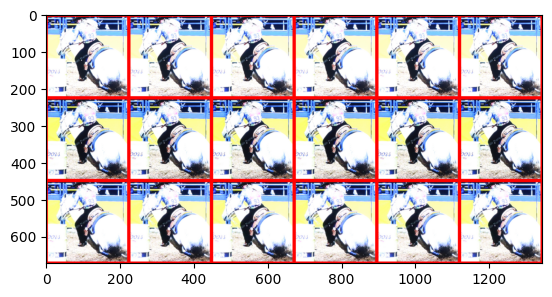

In [19]:
c, f = 'n02795169', 'ILSVRC2012_val_00028797.JPEG' # Horseriding
concat_img_0_0 = prepare_figs(c,f,model_0_0, [5,10,24])
concat_img_0_1 = prepare_figs(c,f,model_0_1, [5,10,24])
concat_img_1_0 = prepare_figs(c,f,model_1_0, [5,10,24])
concat_img_1_1 = prepare_figs(c,f,model_1_1, [5,10,24])
concat_img_2_0 = prepare_figs(c,f,model_2_0, [5,10,24])
concat_img_2_1 = prepare_figs(c,f,model_2_1, [5,10,24])

sz = 224
agg_img = np.zeros((sz * 3, sz * 6, 3), dtype=np.uint8)
i = 0
agg_img[:,sz*i:sz*(i+1)] = concat_img_0_0; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_1_0; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_2_0; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_0_1; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_1_1; i += 1
agg_img[:,sz*i:sz*(i+1)] = concat_img_2_1; i += 1
plt.imshow(agg_img)